**MMT Project Team 13 Data visualization**<br>



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('seaborn')

<ipython-input-1-047b86b25348>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MMT Project/No_music_MMT.csv',sep='|')
df_white = pd.read_csv('/content/drive/MyDrive/MMT Project/White_noise_MMT.csv',sep='|')
df_music = pd.read_csv('/content/drive/MyDrive/MMT Project/Music_original_MMT.csv',sep='|')
df_incr = pd.read_csv('/content/drive/MyDrive/MMT Project/Increased_tempo_MMT.csv',sep='|')

In [ ]:
df.head()

,_id,isPb,wpm,acc,rawWpm,consistency,charStats,mode,mode2,quoteLength,...,punctuation,numbers,language,funbox,difficulty,lazyMode,blindMode,bailedOut,tags,timestamp
0,643bff54b32f409c529023e8,NaN,55.13,96.49,57.86,70.42,"827,11,2,0",time,180,-1,...,False,False,english,none,normal,False,False,False,NaN,1681653588000
1,643bf72fb32f409c5283d176,NaN,47.60,88.57,56.00,63.04,"714,42,7,7",time,180,-1,...,False,False,english,none,normal,False,False,False,NaN,1681651503000
2,643bf578b32f409c5283c493,NaN,65.33,94.64,65.33,69.14,"980,0,0,0",time,180,-1,...,False,False,english,none,normal,False,False,False,NaN,1681651064000
3,643bf04ab32f409c52778b57,NaN,55.86,94.63,56.20,70.22,"838,0,0,1",time,180,-1,...,False,False,english,none,normal,False,False,False,NaN,1681649738000
4,643bdca5b32f409c5258ced9,NaN,76.53,91.80,76.80,60.79,"1148,2,0,1",time,180,-1,...,False,False,english,none,normal,False,False,False,NaN,1681644709000


In [ ]:
df.columns

Index(['_id', 'isPb', 'wpm', 'acc', 'rawWpm', 'consistency', 'charStats',
       'mode', 'mode2', 'quoteLength', 'restartCount', 'testDuration',
       'afkDuration', 'incompleteTestSeconds', 'punctuation', 'numbers',
       'language', 'funbox', 'difficulty', 'lazyMode', 'blindMode',
       'bailedOut', 'tags', 'timestamp'],
      dtype='object')

In [ ]:
df = df.drop([ '_id','isPb','mode', 'mode2', 'quoteLength', 'restartCount', 'testDuration','afkDuration',
              'incompleteTestSeconds', 'punctuation', 'numbers','language', 'funbox', 'difficulty', 
              'lazyMode', 'blindMode','bailedOut', 'tags', 'timestamp'],axis = 1)

df_white = df_white.drop([ '_id','isPb','mode', 'mode2', 'quoteLength', 'restartCount', 'testDuration','afkDuration',
              'incompleteTestSeconds', 'punctuation', 'numbers','language', 'funbox', 'difficulty', 
              'lazyMode', 'blindMode','bailedOut', 'tags', 'timestamp'],axis = 1)

df_music = df_music.drop([ '_id','isPb','mode', 'mode2', 'quoteLength', 'restartCount', 'testDuration','afkDuration',
              'incompleteTestSeconds', 'punctuation', 'numbers','language', 'funbox', 'difficulty', 
              'lazyMode', 'blindMode','bailedOut', 'tags', 'timestamp'],axis = 1)

df_incr = df_incr.drop([ '_id','isPb','mode', 'mode2', 'quoteLength', 'restartCount', 'testDuration','afkDuration',
              'incompleteTestSeconds', 'punctuation', 'numbers','language', 'funbox', 'difficulty', 
              'lazyMode', 'blindMode','bailedOut', 'tags', 'timestamp'],axis = 1)

In [ ]:
df.columns, df_white.columns, df_music.columns, df_incr.columns

(Index(['wpm', 'acc', 'rawWpm', 'consistency', 'charStats'], dtype='object'),
 Index(['wpm', 'acc', 'rawWpm', 'consistency', 'charStats'], dtype='object'),
 Index(['wpm', 'acc', 'rawWpm', 'consistency', 'charStats'], dtype='object'),
 Index(['wpm', 'acc', 'rawWpm', 'consistency', 'charStats'], dtype='object'))

In [ ]:
# For no music
# split the string into four values using the split() method
split_values = df['charStats'].str.split(',')

# create four new columns in the dataframe and assign the split values to them
df['correct'] = split_values.str[0]
df['incorrect'] = split_values.str[1]
df['extra'] = split_values.str[2]
df['missed'] = split_values.str[3]

df = df.drop(['charStats'],axis=1)

# For white noise 
split_values = df_white['charStats'].str.split(',')

df_white['correct'] = split_values.str[0]
df_white['incorrect'] = split_values.str[1]
df_white['extra'] = split_values.str[2]
df_white['missed'] = split_values.str[3]

df_white = df_white.drop(['charStats'],axis=1)

# For music
split_values = df_music['charStats'].str.split(',')

df_music['correct'] = split_values.str[0]
df_music['incorrect'] = split_values.str[1]
df_music['extra'] = split_values.str[2]
df_music['missed'] = split_values.str[3]

df_music = df_music.drop(['charStats'],axis=1)

# For increased tempo
split_values = df_incr['charStats'].str.split(',')

df_incr['correct'] = split_values.str[0]
df_incr['incorrect'] = split_values.str[1]
df_incr['extra'] = split_values.str[2]
df_incr['missed'] = split_values.str[3]

df_incr = df_incr.drop(['charStats'],axis=1)

In [ ]:
df.head(10)

,wpm,acc,rawWpm,consistency,correct,incorrect,extra,missed
0,55.13,96.49,57.86,70.42,827,11,2,0
1,47.60,88.57,56.00,63.04,714,42,7,7
2,65.33,94.64,65.33,69.14,980,0,0,0
3,55.86,94.63,56.20,70.22,838,0,0,1
4,76.53,91.80,76.80,60.79,1148,2,0,1
5,33.93,94.08,35.40,45.41,509,4,2,2
6,76.20,96.00,76.20,70.59,1143,0,0,0
7,41.40,94.85,43.80,58.93,621,10,3,4
8,72.27,93.81,72.27,64.06,1084,0,0,0
9,36.06,86.03,40.20,65.02,541,15,3,0


In [ ]:
df_white.head()

,wpm,acc,rawWpm,consistency,correct,incorrect,extra,missed
0,53.73,97.62,55.33,64.94,806,5,1,0
1,48.60,92.44,52.93,69.99,729,22,4,2
2,65.33,93.53,65.40,69.62,980,1,0,0
3,49.67,90.66,49.93,66.24,745,1,0,0
4,84.33,94.51,84.93,68.44,1265,2,0,2


In [ ]:
fig = px.bar(x=['Male','Female'],y=[24,6],width=500,title="Gender Distribution of Participants in the Experiment",text_auto=True)
fig.show()

**Violin Plots**

In [ ]:
'''
Distribution of typing speed in WPM across various groups
'''

df1 = pd.DataFrame({"category":['no_music']*30,
                    "value":df['wpm'],
                    "dataset":["No Music"]*30})

df2 = pd.DataFrame({"category":['white_noise']*30,
                    "value":df_white['wpm'],
                    "dataset":["White Noise"]*30})

df3 = pd.DataFrame({"category":['music']*30,
                    "value":df_music['wpm'],
                    "dataset":["Music"]*30})

df4 = pd.DataFrame({"category":['incr_tempo']*30,
                    "value":df_incr['wpm'],
                    "dataset":["Increased Tempo"]*30})

# Combine dataframes into one
data = pd.concat([df1, df2, df3, df4])

# Create violin plot with box plot and individual data points
fig = px.violin(data, x="category", y="value", color="dataset",
                box=True, points="all", title="Distribution of Typing speed(WPM) across groups")

# Add labels to x and y axis
fig.update_layout(xaxis_title="Category", yaxis_title="Value",height=400,width=1200)

# Show plot
fig.show()


In [ ]:
'''
Distribution of Accuracy across various groups
'''

df1 = pd.DataFrame({"category":['no_music']*30,
                    "value":df['acc'],
                    "dataset":["No Music"]*30})

df2 = pd.DataFrame({"category":['white_noise']*30,
                    "value":df_white['acc'],
                    "dataset":["White Noise"]*30})

df3 = pd.DataFrame({"category":['music']*30,
                    "value":df_music['acc'],
                    "dataset":["Music"]*30})

df4 = pd.DataFrame({"category":['incr_tempo']*30,
                    "value":df_incr['acc'],
                    "dataset":["Increased Tempo"]*30})

# Combine dataframes into one
data = pd.concat([df1, df2, df3, df4])

# Create violin plot with box plot and individual data points
fig = px.violin(data, x="category", y="value", color="dataset",
                box=True, points="all", title="Distribution of accuracy across groups")

# Add labels to x and y axis
fig.update_layout(xaxis_title="Category", yaxis_title="Value",height=400,width=1200)

# Show plot
fig.show()

In [ ]:
'''
Distribution of Consistency across various groups
'''

df1 = pd.DataFrame({"category":['no_music']*30,
                    "value":df['consistency'],
                    "dataset":["No Music"]*30})

df2 = pd.DataFrame({"category":['white_noise']*30,
                    "value":df_white['consistency'],
                    "dataset":["White Noise"]*30})

df3 = pd.DataFrame({"category":['music']*30,
                    "value":df_music['consistency'],
                    "dataset":["Music"]*30})

df4 = pd.DataFrame({"category":['incr_tempo']*30,
                    "value":df_incr['consistency'],
                    "dataset":["Increased Tempo"]*30})

# Combine dataframes into one
data = pd.concat([df1, df2, df3, df4])

# Create violin plot with box plot and individual data points
fig = px.violin(data, x="category", y="value", color="dataset",
                box=True, points="all", title="Distribution of consistency across groups")

# Add labels to x and y axis
fig.update_layout(xaxis_title="Category", yaxis_title="Value",height=400,width=1200)

# Show plot
fig.show()

In [ ]:
fig = px.violin(df, y="wpm",box=True, points='all',title="WPM distribution with No Music",width=800, height=700)
fig.show()

In [ ]:
fig = px.violin(df_white, y="wpm",box=True, points='all',title="WPM distribution with White noise",width=800, height=700)
fig.show()

In [ ]:
fig = px.violin(df_music, y="wpm",box=True, points='all',title="WPM distribution with Music",width=800, height=700)
fig.show()

In [ ]:
fig = px.violin(df_incr, y="wpm",box=True, points='all',title="WPM distribution with Increased tempo Music",width=800, height=700)
fig.show()

**Histogram**

In [ ]:
fig = px.histogram(df, x="wpm",nbins=9,title="No music",width=800, height=400)
fig.update_layout(xaxis=dict(range=[0,100]))
fig.show()

In [ ]:
fig = px.histogram(df_white, x="wpm",nbins=9,title="White Noise",width=800, height=400)
fig.update_layout(xaxis=dict(range=[0,100]))
fig.show()

In [ ]:
fig = px.histogram(df_music, x="wpm",nbins=9,title="With Music",width=800, height=400)
fig.update_layout(xaxis=dict(range=[0,100]))
fig.show()

In [ ]:
fig = px.histogram(df_incr, x="wpm",nbins=10,title="Increased Tempo",width=800, height=400)
fig.update_layout(xaxis=dict(range=[0,100]))
fig.show()

In [ ]:
df_white.head()

,wpm,acc,rawWpm,consistency,correct,incorrect,extra,missed
0,53.73,97.62,55.33,64.94,806,5,1,0
1,48.60,92.44,52.93,69.99,729,22,4,2
2,65.33,93.53,65.40,69.62,980,1,0,0
3,49.67,90.66,49.93,66.24,745,1,0,0
4,84.33,94.51,84.93,68.44,1265,2,0,2


In [ ]:
df["correct"]  = df["correct"].astype(int)
df_white["correct"] = df_white["correct"].astype(int)
df_music["correct"] = df_music["correct"].astype(int)
df_incr["correct"] = df_incr["correct"].astype(int)

df["incorrect"]  = df["incorrect"].astype(int)
df_white["incorrect"] = df_white["incorrect"].astype(int)
df_music["incorrect"] = df_music["incorrect"].astype(int)
df_incr["incorrect"] = df_incr["incorrect"].astype(int)

df["extra"]  = df["extra"].astype(int)
df_white["extra"] = df_white["extra"].astype(int)
df_music["extra"] = df_music["extra"].astype(int)
df_incr["extra"] = df_incr["extra"].astype(int)

df["missed"]  = df["missed"].astype(int)
df_white["missed"] = df_white["missed"].astype(int)
df_music["missed"] = df_music["missed"].astype(int)
df_incr["missed"] = df_incr["missed"].astype(int)

In [ ]:
no_correct = df["correct"].mean()
wh_correct = df_white["correct"].mean()
mu_correct = df_music["correct"].mean()
in_correct = df_incr["correct"].mean()


no_incorrect = df["incorrect"].mean()
wh_incorrect = df_white["incorrect"].mean()
mu_incorrect = df_music["incorrect"].mean()
in_incorrect = df_incr["incorrect"].mean()

no_extra = df["extra"].mean()
wh_extra = df_white["extra"].mean()
mu_extra = df_music["extra"].mean()
in_extra = df_incr["extra"].mean()

no_missed = df["missed"].mean()
wh_missed = df_white["missed"].mean()
mu_missed = df_music["missed"].mean()
in_missed = df_incr["missed"].mean()

data_new = [['correct', no_correct, wh_correct, mu_correct, in_correct], 
        ['incorrect',no_incorrect, wh_incorrect, mu_incorrect, in_incorrect],
        ['extra',no_extra, wh_extra, mu_extra, in_extra],
        ['missed',no_missed, wh_missed, mu_missed, in_missed]]

data = [['no_music', no_correct, no_incorrect, no_extra, no_missed], 
        ['white_music',wh_correct, wh_incorrect, wh_extra, wh_missed],
        ['music',mu_correct, mu_incorrect, mu_extra, mu_missed],
        ['incr',in_correct, in_incorrect, in_extra, in_missed]]

char_mean = pd.DataFrame(data,columns = ['charStat','correct', 'incorrect','extra', 'missed'])

In [ ]:
char_mean

,charStat,correct,incorrect,extra,missed
0,no_music,857.700000,11.2,2.733333,1.566667
1,white_music,849.233333,9.5,2.066667,1.600000
2,music,855.966667,11.1,2.600000,2.266667
3,incr,846.766667,10.8,2.766667,1.600000


In [ ]:
no_correct_med = df["correct"].median()
wh_correct_med = df_white["correct"].median()
mu_correct_med = df_music["correct"].median()
in_correct_med = df_incr["correct"].median()


no_incorrect_med = df["incorrect"].median()
wh_incorrect_med = df_white["incorrect"].median()
mu_incorrect_med = df_music["incorrect"].median()
in_incorrect_med = df_incr["incorrect"].median()

no_extra_med = df["extra"].median()
wh_extra_med = df_white["extra"].median()
mu_extra_med = df_music["extra"].median()
in_extra_med = df_incr["extra"].median()

no_missed_med = df["missed"].median()
wh_missed_med = df_white["missed"].median()
mu_missed_med = df_music["missed"].median()
in_missed_med = df_incr["missed"].median()

data_new = [['correct', no_correct, wh_correct, mu_correct, in_correct], 
        ['incorrect',no_incorrect, wh_incorrect, mu_incorrect, in_incorrect],
        ['extra',no_extra, wh_extra, mu_extra, in_extra],
        ['missed',no_missed, wh_missed, mu_missed, in_missed]]

data_med = [['no_music', no_correct_med, no_incorrect_med, no_extra_med, no_missed_med], 
        ['white_music',wh_correct_med, wh_incorrect_med, wh_extra_med, wh_missed_med],
        ['music',mu_correct_med, mu_incorrect_med, mu_extra_med, mu_missed_med],
        ['incr',in_correct_med, in_incorrect_med, in_extra_med, in_missed_med]]

char_med = pd.DataFrame(data_med,columns = ['charStat','correct', 'incorrect','extra', 'missed'])

In [ ]:
fig = px.bar(char_mean, x="charStat", y=["correct", "incorrect", "extra","missed"], title="Character Stats(mean)")
fig.show()

In [ ]:
char_med

,charStat,correct,incorrect,extra,missed
0,no_music,798.5,7.0,1.5,1.0
1,white_music,774.5,5.0,0.5,1.0
2,music,786.0,7.0,1.0,1.0
3,incr,792.0,8.5,2.0,1.0


In [ ]:
fig = px.bar(char_med, x="charStat", y=["correct", "incorrect", "extra","missed"], title="Character Stats(median)")
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

char = ['no_music','white_noise','music','incr_tempo']
correct = [857.7, 849.233, 855.9667, 846.766]
incorrect = [11.2, 9.5, 11.2, 10.8]
extra = [2.733, 2.067, 2.6, 2.7667 ]
missed = [1.566, 1.6, 2.267, 1.6]


fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Correct chars", "Incorrect chars", "Extra chars", "Missed chars"))

fig.add_trace(go.Scatter(x=char, y=correct),
              row=1, col=1)

fig.add_trace(go.Scatter(x=char, y=incorrect),
              row=1, col=2)

fig.add_trace(go.Scatter(x=char, y=extra),
              row=2, col=1)

fig.add_trace(go.Scatter(x=char, y=missed),
              row=2, col=2)

fig.update_layout(height=500, width=700,
                  title_text="Char stats across control groups(mean)")

fig.show()

In [ ]:
char = ['no_music','white_noise','music','incr_tempo']
correct = [857.7, 849.233, 855.9667, 846.766]
incorrect = [11.2, 9.5, 11.2, 10.8]
extra = [2.733, 2.067, 2.6, 2.7667 ]
missed = [1.566, 1.6, 2.267, 1.6]

fig = px.bar(x=[857.7, 849.233, 855.9667, 846.766],y=['no_music','white_noise','music','incr_tempo'])
fig.update_layout(yaxis=dict(range=[0,100]))


In [ ]:
char = ['no_music','white_noise','music','incr_tempo']
correct = [798.5, 774.5, 786.0, 792]
incorrect = [11.2, 9.5, 11.2, 10.8]
extra = [2.733, 2.067, 2.6, 2.7667 ]
missed = [1.566, 1.6, 2.267, 1.6]

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Correct chars", "Incorrect chars", "Extra chars", "Missed chars"))

fig.add_trace(go.Scatter(x=char, y=correct),
              row=1, col=1)

fig.add_trace(go.Scatter(x=char, y=incorrect),
              row=1, col=2)

fig.add_trace(go.Scatter(x=char, y=extra),
              row=2, col=1)

fig.add_trace(go.Scatter(x=char, y=missed),
              row=2, col=2)

fig.update_layout(height=500, width=700,
                  title_text="Char stats across control groups(median)")

fig.show()

In [ ]:
df.columns

Index(['wpm', 'acc', 'rawWpm', 'consistency', 'correct', 'incorrect', 'extra',
       'missed'],
      dtype='object')

In [ ]:
no_acc_med = df["acc"].median()
wh_acc_med = df_white["acc"].median()
mu_acc_med = df_music["acc"].median()
in_acc_med = df_incr["acc"].median()


no_cons_med = df["consistency"].median()
wh_cons_med = df_white["consistency"].median()
mu_cons_med = df_music["consistency"].median()
in_cons_med = df_incr["consistency"].median()

no_wpm_med = df["wpm"].median()
wh_wpm_med = df_white["wpm"].median()
mu_wpm_med = df_music["wpm"].median()
in_wpm_med = df_incr["wpm"].median()

no_raw_med = df["rawWpm"].median()
wh_raw_med = df_white["rawWpm"].median()
mu_raw_med = df_music["rawWpm"].median()
in_raw_med = df_incr["rawWpm"].median()

data_new = [['correct', no_correct, wh_correct, mu_correct, in_correct], 
        ['incorrect',no_incorrect, wh_incorrect, mu_incorrect, in_incorrect],
        ['extra',no_extra, wh_extra, mu_extra, in_extra],
        ['missed',no_missed, wh_missed, mu_missed, in_missed]]

data_med = [['no_music', no_acc_med, no_cons_med, no_wpm_med, no_raw_med], 
        ['white_music',wh_acc_med, wh_cons_med, wh_wpm_med, wh_raw_med],
        ['music',mu_acc_med, mu_cons_med, mu_wpm_med, mu_raw_med],
        ['incr',in_acc_med, in_cons_med, in_wpm_med, in_raw_med]]

stat_med = pd.DataFrame(data_med,columns = ['group','accuracy', 'consistency','wpm', 'rawWpm'])

In [ ]:
stat_med

,group,accuracy,consistency,wpm,rawWpm
0,no_music,93.305,66.095,53.230,56.230
1,white_music,93.375,65.590,51.630,53.000
2,music,93.480,64.900,52.400,54.600
3,incr,93.245,64.115,52.795,54.795


In [ ]:
char = ['no_music','white_noise','music','incr_tempo']
accuracy = [93.305, 93.375, 93.48, 93.245]
consistency = [66.095, 65.590, 64.9, 64.115]
wpm = [53.23, 51.63, 52.4, 52.795]
raw = [56.23, 53, 54.6, 54.795]

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Accuracy", "Consistency","WPM","Raw WPM"))

fig.add_trace(go.Scatter(x=char, y=accuracy),
              row=1, col=1)

fig.add_trace(go.Scatter(x=char, y=consistency),
              row=1, col=2)

fig.add_trace(go.Scatter(x=char, y=wpm),
              row=2, col=1)

fig.add_trace(go.Scatter(x=char, y=raw),
              row=2, col=2)

fig.update_layout(height=500, width=700,
                  title_text="stats across control groups(median)")

fig.show()

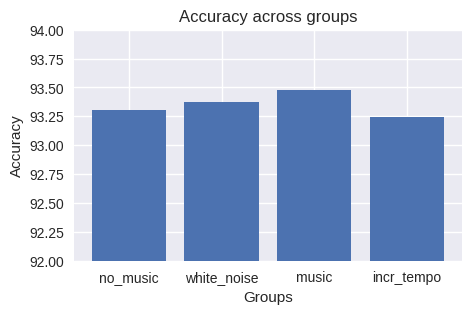

In [ ]:
char = ['no_music','white_noise','music','incr_tempo']
accuracy = [93.305, 93.375, 93.48, 93.245]
consistency = [66.095, 65.590, 64.9, 64.115]
wpm = [53.23, 51.63, 52.4, 52.795]
raw = [56.23, 53, 54.6, 54.795]

# fig = px.bar(x=[93.305, 93.375, 93.48, 93.245], y=['no_music','white_noise','music','incr_tempo'])
# fig.update_layout(yaxis=dict(range=[92,95]))
# fig.show()
fig = plt.figure(figsize=(5, 3))
plt.bar(char,accuracy)
plt.xlabel("Groups")
plt.ylabel("Accuracy")
plt.ylim(92,94)
plt.title("Accuracy across groups")
plt.show()

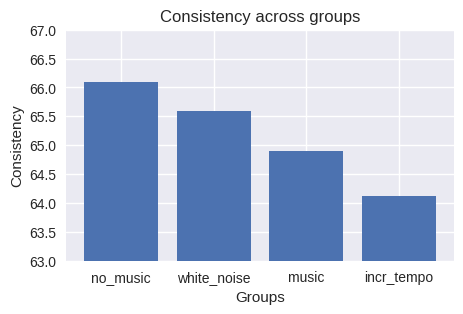

In [ ]:
fig = plt.figure(figsize=(5, 3))
plt.bar(char,consistency)
plt.xlabel("Groups")
plt.ylabel("Consistency")
plt.ylim(63,67)
plt.title("Consistency across groups")
plt.show()

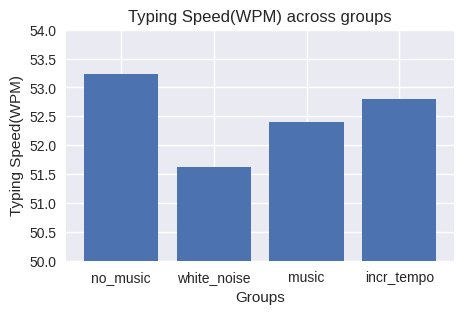

In [ ]:
fig = plt.figure(figsize=(5, 3))
plt.bar(char,wpm)
plt.xlabel("Groups")
plt.ylabel("Typing Speed(WPM)")
plt.ylim(50,54)
plt.title("Typing Speed(WPM) across groups")
plt.show()

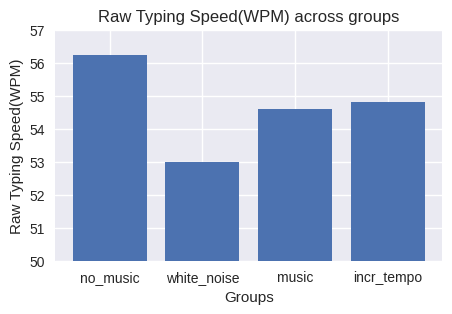

In [ ]:
fig = plt.figure(figsize=(5, 3))
plt.bar(char,raw)
plt.xlabel("Groups")
plt.ylabel("Raw Typing Speed(WPM)")
plt.ylim(50,57)
plt.title("Raw Typing Speed(WPM) across groups")
plt.show()

In [ ]:
no_acc = df["acc"].mean()
wh_acc = df_white["acc"].mean()
mu_acc = df_music["acc"].mean()
in_acc = df_incr["acc"].mean()


no_cons = df["consistency"].mean()
wh_cons = df_white["consistency"].mean()
mu_cons = df_music["consistency"].mean()
in_cons = df_incr["consistency"].mean()

no_wpm = df["wpm"].mean()
wh_wpm = df_white["wpm"].mean()
mu_wpm = df_music["wpm"].mean()
in_wpm = df_incr["wpm"].mean()

no_raw = df["rawWpm"].mean()
wh_raw = df_white["rawWpm"].mean()
mu_raw = df_music["rawWpm"].mean()
in_raw = df_incr["rawWpm"].mean()

data_new = [['correct', no_correct, wh_correct, mu_correct, in_correct], 
        ['incorrect',no_incorrect, wh_incorrect, mu_incorrect, in_incorrect],
        ['extra',no_extra, wh_extra, mu_extra, in_extra],
        ['missed',no_missed, wh_missed, mu_missed, in_missed]]

data = [['no_music', no_acc, no_cons, no_wpm, no_raw], 
        ['white_music',wh_acc, wh_cons, wh_wpm, wh_raw],
        ['music',mu_acc, mu_cons, mu_wpm, mu_raw],
        ['incr',in_acc, in_cons, in_wpm, in_raw]]

stat = pd.DataFrame(data,columns = ['group','accuracy', 'consistency','wpm', 'rawWpm'])

In [ ]:
stat

,group,accuracy,consistency,wpm,rawWpm
0,no_music,92.714000,64.975667,57.177667,59.802000
1,white_music,92.872333,64.228000,56.615000,58.953333
2,music,93.141667,64.876667,57.063000,59.800000
3,incr,92.696667,64.082333,56.448000,59.188333


In [ ]:
char = ['no_music','white_noise','music','incr_tempo']
accuracy = stat["accuracy"]
consistency = stat["consistency"]
wpm = stat["wpm"]
raw = stat["rawWpm"]

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Accuracy", "Consistency","WPM","Raw WPM"))

fig.add_trace(go.Scatter(x=char, y=accuracy),
              row=1, col=1)

fig.add_trace(go.Scatter(x=char, y=consistency),
              row=1, col=2)

fig.add_trace(go.Scatter(x=char, y=wpm),
              row=2, col=1)

fig.add_trace(go.Scatter(x=char, y=raw),
              row=2, col=2)

fig.update_layout(height=500, width=700,
                  title_text="stats across control groups(mean)")

fig.show()

In [ ]:
trace1 = go.Scatter(
    x=df["wpm"],
    y=df["acc"],
    mode="markers",
    name="No music data points",
    marker=dict(
        color="coral"
    ),
    line=dict(
        color="coral",
        width=2
    )
)

# Add trendline to first scatter plot
z = np.polyfit(df["wpm"], df["acc"], 1)
p = np.poly1d(z)
trendline1 = go.Scatter(
    x=df["wpm"],
    y=p(df["wpm"]),
    mode="lines",
    name="No Music Trendline",
    line=dict(
        color="coral",
        width=2
    )
)

# Create the second scatter plot
trace2 = go.Scatter(
    x=df_white["wpm"],
    y=df_white["acc"],
    mode="markers",
    name="White Noise data points",
    marker=dict(
        color="olive"
    ),
    line=dict(
        color="olive",
        width=2
    )
)

# Add trendline to second scatter plot
z = np.polyfit(df_white["wpm"], df_white["acc"], 1)
p = np.poly1d(z)
trendline2 = go.Scatter(
    x=df_white["wpm"],
    y=p(df_white["wpm"]),
    mode="lines",
    name="White Noise Trendline",
    line=dict(
        color="olive",
        width=2
    )
)

# Create the third scatter plot
trace3 = go.Scatter(
    x=df_music["wpm"],
    y=df_music["acc"],
    mode="markers",
    name="Music Data points",
    marker=dict(
        color="purple"
    ),
    line=dict(
        color="purple",
        width=2
    )
)

# Add trendline to third scatter plot
z = np.polyfit(df_music["wpm"], df_music["acc"], 1)
p = np.poly1d(z)
trendline3 = go.Scatter(
    x=df_music["wpm"],
    y=p(df_music["wpm"]),
    mode="lines",
    name="Music Trendline",
    line=dict(
        color="purple",
        width=2
    )
)

# Create the fourth scatter plot
trace4 = go.Scatter(
    x=df_incr["wpm"],
    y=df_incr["acc"],
    mode="markers",
    name="Increased Tempo data points",
    marker=dict(
        color="teal"
    ),
    line=dict(
        color="teal",
        width=2
    )
)

# Add trendline to fourth scatter plot
z = np.polyfit(df_incr["wpm"], df_incr["acc"], 1)
p = np.poly1d(z)
trendline4 = go.Scatter(
    x=df_incr["wpm"],
    y=p(df_incr["wpm"]),
    mode="lines",
    name="Increased Tempo Trendline",
    line=dict(
        color="teal",
        width=2
    )
)

# Create the merged graph
fig = go.Figure(data=[trace1, trendline1, trace2, trendline2,trace3, trendline3, trace4, trendline4])

# Update the layout
fig.update_layout(
    title="Merged Scatter Plots with Trendlines",
    xaxis_title="Typing Speed(WPM)",
    yaxis_title="Accuracy",
    width = 900,
    height=400
)

# Show the graph
fig.show()